In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import datetime
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
import csv
from urllib.request import urlopen

# reads in data from the given url and 
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

#print(lines)
data = pd.read_csv(url)

In [3]:
# clean the data
data = data.dropna(subset=['continent'])
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [4]:
def hdi_level(df):
    '''Creates a new column in the DataFrame that splits countries into 1 or 4 HDI categories
    Args:
        df (DataFrame), covid dataframe
    Returns:
        hdi_df (DataFrame), new dataframe with new HDI_Group column'''
    # creates an empty list to save all the HDI_groups
    hdi_group_lst = list()
    for ind, row in df.iterrows():
        # low end of HD_Index
        if ((row['human_development_index'] > 0) & (row['human_development_index'] <= 0.549)):
            hdi_group_lst.append('Low')
        # mid-low end of HD_Index
        elif ((row['human_development_index'] >0.549) & (row['human_development_index'] <= 0.699)):
            hdi_group_lst.append('Medium')
            # same thing
        # mid-high end of HD_Index    
        elif ((row['human_development_index'] >0.699) & (row['human_development_index'] <= 0.799)):
            hdi_group_lst.append('High')
        # high-end of HD_Index
        elif ((row['human_development_index'] >0.799) & (row['human_development_index'] <= 1)):
            hdi_group_lst.append('Very High')
        else:
            hdi_group_lst.append(np.nan)
    # adds new column HDI_Group       
    hdi_df = df.assign(HDI_Group = hdi_group_lst)
    return hdi_df

In [5]:
# call function and display data
hdi_df = hdi_level(data)
hdi_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,HDI_Group
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,Low
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,Low
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,Low
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,Low
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,Low


In [6]:
# hdi_top = hdi_df.groupby('location').mean()
# hdi_top.sort_values(by='population', ascending = False).head(50)

In [7]:
def hdi_plot(data, plt_col):
    '''plots a line plot of the the different HDI Groups
    Args:
        data (DataFrame), take in the dataframe with the HDI_Group column
        plt_col (str), choose a column to plot on the y-axis
    Returns:
        plot, returns a line plot with one line for every HDI_group where Date is the x-axis'''
    
    # group data with date and HDI_group as index. Get mean
    grouped_df = data.groupby(['date', 'HDI_Group'])[plt_col].mean().reset_index()
    
    # plot dataframe and set titles and labels
    sns.set(font_scale = 1.3)
    sns.lineplot(data=grouped_df, x="date", y=plt_col, hue = 'HDI_Group')
    plt.gcf().set_size_inches(12, 8)
    plt.title(f'{plt_col} by Human Development Index Group')
    plt.xlabel('Date')
    plt.ylabel(plt_col)
    
    # Set X range. Using left and right variables makes it easy to change the range.
    left = dt.date(2020, 1, 1)
    right = dt.date(2021, 4, 19)
    
    # Changes x-axis range
    plt.gca().set_xbound(left, right)

/Users/Rikin/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


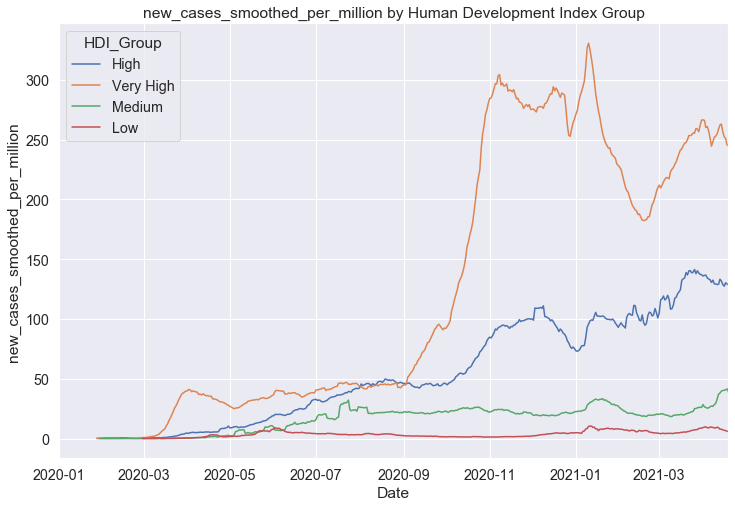

In [8]:
# call and plot function with new_cases_smoothed_per_million as the y-axis
hdi_plot(hdi_df, 'new_cases_smoothed_per_million')

This graph shows the average number of new covid cases (smoothed over a 7-day period) based on the Human Development Index (HDI) Group it is in. This shows that the countries with High and Very High HDI measures averaged  more new cases per million. Factors that may have led to higher averages could be higher populations in countries of a higher HDI category. 

The HDI is a measure of a long life, being educated and the standard of living. The higher the number, the greater the overall development of the country. Each country is in a HDI Group of Low ( HDI <= 0.549), Medium (0.549 < HDI <= 0.699), High (0.699 < HDI <= 0.799), Very High ( HDI >= 0.80). The HDI measure was created by the [United Nations Development Programme (UNDP)] (http://hdr.undp.org/en/content/human-development-index-hdi). 